In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
DS = pd.read_excel('AustraliaFiltered.xlsx')
DS



,Unnamed: 0,Country,AreaName,Region,DevName,1980,1981,1982,1983,1984,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
0,432,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,43540,57050,51730,31660,25150,...,51000,52940,57330,70150,53140,53300,57250,61490,65160,1333340
1,367,New Zealand,Oceania,Australia and New Zealand,Developed regions,34370,34440,23920,13620,16900,...,47230,45570,29500,28000,40710,44680,45550,39120,46960,898760
2,434,United States of America,Northern America,Northern America,Developed regions,10470,12080,12490,11110,11840,...,18030,19230,18950,18980,18540,18490,17320,19260,20860,450370
3,266,"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,4170,4380,4980,5480,7450,...,16410,18620,20200,19220,9740,10070,10270,9680,11030,388640
4,265,China,Asia,Eastern Asia,Developing regions,860,870,560,580,1220,...,16700,22220,29000,33410,29860,28820,32190,42920,54300,387180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,392,Saint Helena,Africa,Western Africa,Developing regions,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,393,Saint Kitts and Nevis,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,395,Saint Vincent and the Grenadines,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,230,Anguilla,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Country
China                                                    387180
China, Hong Kong Special Administrative Region           388640
New Zealand                                              898760
United Kingdom of Great Britain and Northern Ireland    1333340
United States of America                                 450370
Name: Total, dtype: int64


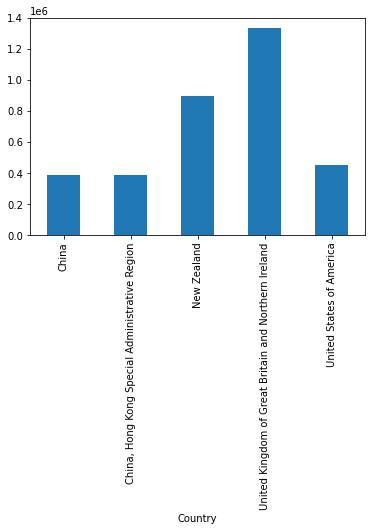

   Unnamed: 0                                            Country  \
0         432  United Kingdom of Great Britain and Northern I...   
1         367                                        New Zealand   
2         434                           United States of America   
3         266     China, Hong Kong Special Administrative Region   
4         265                                              China   

           AreaName                     Region             DevName   1980  \
0            Europe            Northern Europe   Developed regions  43540   
1           Oceania  Australia and New Zealand   Developed regions  34370   
2  Northern America           Northern America   Developed regions  10470   
3              Asia               Eastern Asia  Developing regions   4170   
4              Asia               Eastern Asia  Developing regions    860   

    1981   1982   1983   1984  ...   2000   2001   2002   2003   2004   2005  \
0  57050  51730  31660  25150  ...  51000  52940

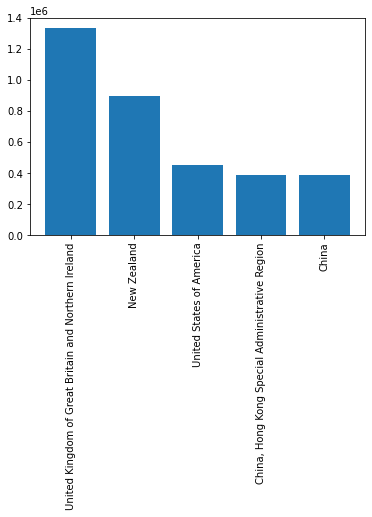

In [81]:
#Plot bar chart of total no of immigrants for top 5 countires having max no of total immigrants

m = DS.head(5).groupby('Country').Total.max()
print(m)
m.plot(x = 'Country',y = 'Total',kind='bar')
plt.show()


#or 

m = DS.sort_values(by = 'Total',ascending=False).head()
print(m)


plt.bar(m.Country.values,m.Total.values)
plt.xticks(rotation=90)
plt.show()


AreaName
Africa                              354440
Asia                               3463640
Europe                             2166780
Latin America and the Caribbean     120350
Northern America                    592060
Oceania                            1126180
Name: Total, dtype: int64


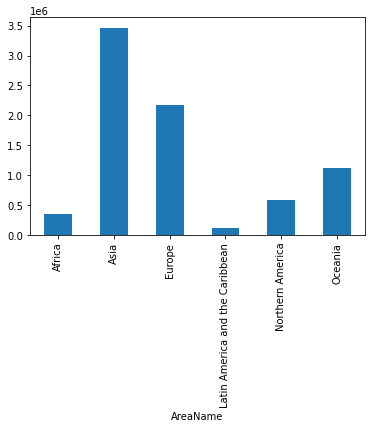

In [4]:
#Find total immigrants from each category by area name and plot barchart for each area

n = DS.groupby('AreaName').Total.sum()
print(n)

n.plot(kind='bar')
plt.show()

           0
1980  180230
1981  208250
1982  191190
1983  150350
1984  149560
1985  167940
1986  191310
1987  215100
1988  247500
1989  232690
1990  228910
1991  230300
1992  212670
1993  190780
1994  216640
1995  249600
1996  256990
1997  257290
1998  264990
1999  287020
2000  312060
2001  351320
2002  359830
2003  386690
2004  349340
2005  361670
2006  399890
2007  442340
2008  531000


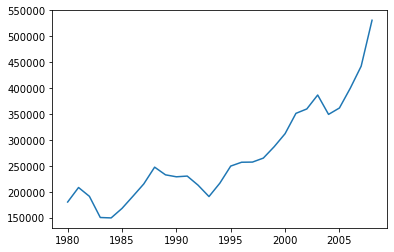

In [95]:
#Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.

imm_trend = DS.loc[:,'1980':'2008'].sum()
print(imm_trend.to_frame())

imm_trend.plot(kind='line')
plt.show()


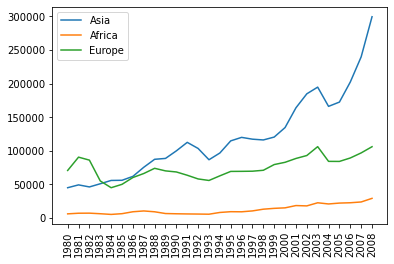

In [23]:
#Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).

grp = DS.groupby('AreaName')

asia_trend = grp.get_group('Asia').loc[:,'1980':'2008'].sum()
plt.plot(asia_trend,label='Asia')

africa_trend = grp.get_group('Africa').loc[:,'1980':'2008'].sum()
plt.plot(africa_trend,label='Africa')

europe_trend = grp.get_group('Europe').loc[:,'1980':'2008'].sum()
plt.plot(europe_trend,label='Europe')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

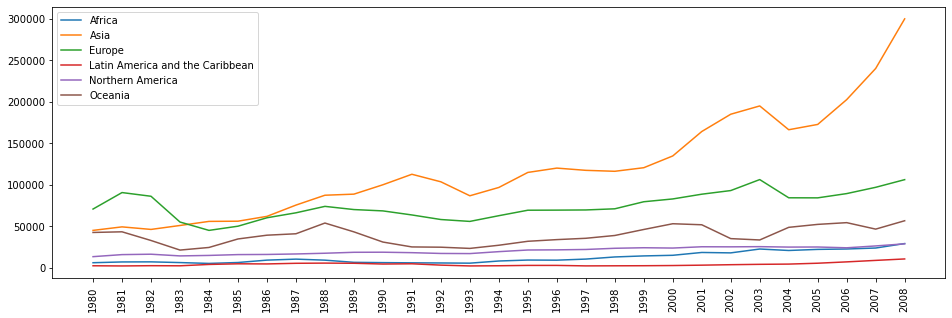

In [25]:
#Plot Total Immigrants based on DevelopmenRegion

plt.figure(figsize=(16,5))

years = map(str, list(range(1980,2009)))
years = list(years)

res = DS.groupby('AreaName')[years].sum() # group by area and take out years data
for row in res.index:
    plt.plot(res.loc[row], label = row)
    
plt.xticks(rotation = 90)
plt.legend()
plt.show()

1980     1220
1981     1560
1982     1870
1983     2090
1984     2300
1985     2510
1986     2390
1987     2900
1988     2990
1989     2980
1990     3930
1991     6080
1992     5450
1993     3350
1994     4570
1995     6420
1996     5780
1997     6410
1998     7810
1999     8370
2000    10390
2001     9380
2002     9240
2003    15080
2004    18310
2005    19920
2006    27880
2007    41920
2008    58400
dtype: int64


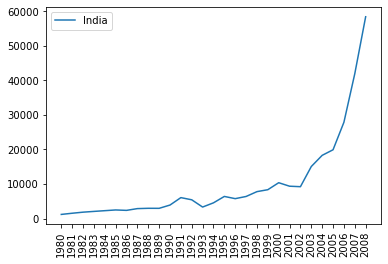

In [28]:
#Plot immigration trend for India using line plot

india_trend = DS[DS['Country']=='India'].loc[:,'1980':'2008'].sum()
print(india_trend)

plt.plot(india_trend,label='India')
plt.legend()
plt.xticks(rotation=90)
plt.show()

   Unnamed: 0                                            Country  \
0         432  United Kingdom of Great Britain and Northern I...   
1         367                                        New Zealand   
2         434                           United States of America   
3         266     China, Hong Kong Special Administrative Region   
4         265                                              China   

           AreaName                     Region             DevName   1980  \
0            Europe            Northern Europe   Developed regions  43540   
1           Oceania  Australia and New Zealand   Developed regions  34370   
2  Northern America           Northern America   Developed regions  10470   
3              Asia               Eastern Asia  Developing regions   4170   
4              Asia               Eastern Asia  Developing regions    860   

    1981   1982   1983   1984  ...   2000   2001   2002   2003   2004   2005  \
0  57050  51730  31660  25150  ...  51000  52940

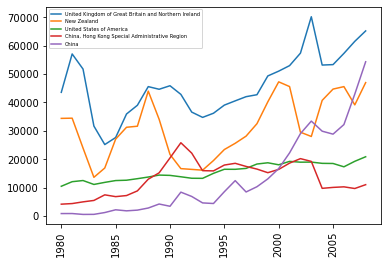

In [102]:
#Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot

d = DS.sort_values(by = 'Total',ascending=False).head()
print(d)

values = d.loc[:,'1980':'2008']
print(values)

DS1 = pd.DataFrame(values.T)
DS1.columns = d.Country
print(DS1)


DS1.plot(kind='line')
plt.legend(fontsize = 5)
plt.xticks(rotation=90)
plt.show()

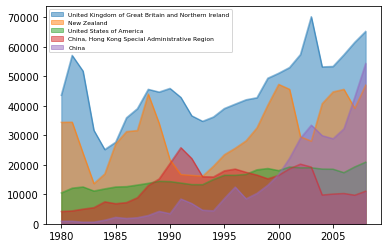

In [93]:
#For the above use area plot with alpha = 0.5

d = DS.sort_values(by='Total',ascending=False).head()
values = d.loc[:,'1980':'2008']


DS1 = pd.DataFrame(values.T)
DS1.columns = d.Country

DS1.plot(kind='area',stacked=False,alpha=0.5)
plt.legend(fontsize=6)
plt.show()

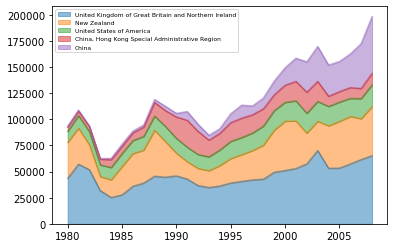

In [94]:
#Compare Immigration Trend for top-5 countires using stacked area plot

d = DS.sort_values(by='Total',ascending=False).head()
values = d.loc[:,'1980':'2008']


DS1 = pd.DataFrame(values.T)
DS1.columns = d.Country

DS1.plot(kind='area',stacked=True,alpha=0.5)
plt.legend(fontsize=6)
plt.show()